In [1]:
import numpy as np  
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [5]:
x_train_norm = x_train.astype('float32') / 255.
x_train_norm = np.reshape(x_train_norm, (len(x_train_norm), 28, 28, 1))
x_train_norm.shape

(60000, 28, 28, 1)

In [6]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras import regularizers

input_img = Input(shape=(28, 28, 1)) 
x = Conv2D(64, (3, 3), activation='sigmoid', padding='same', name="c1")(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name="c3")(x)

x = UpSampling2D((2, 2))(encoded)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='last_layer')(x)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')
train_history = autoencoder.fit(x=x_train_norm, y=x_train_norm, batch_size=100, epochs=10, shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.1805
Epoch 2/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0925
Epoch 3/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0828
Epoch 4/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0784
Epoch 5/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0761
Epoch 6/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0746
Epoch 7/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0737
Epoch 8/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0729
Epoch 9/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0722
Epoch 10/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0717


In [8]:
np.shape(x_test)

(10000, 28, 28)

In [9]:
x_test = x_test.astype('float32')
x_test_norm = x_test/255
x_test_norm = np.reshape(x_test_norm, (len(x_test_norm), 28, 28, 1))

In [10]:
decoded_imgs = autoencoder.predict(x_test_norm)

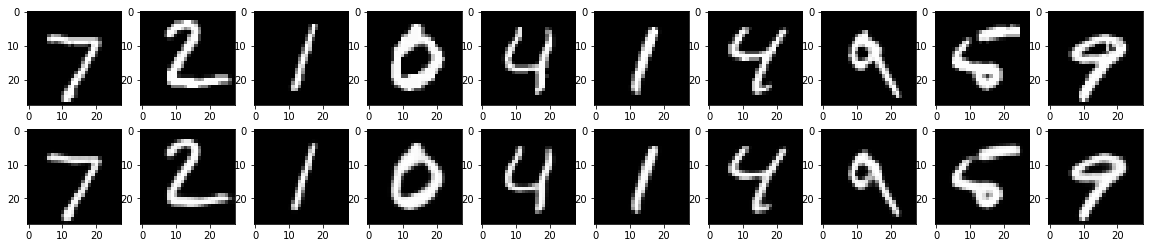

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
n = 10
for i in range(n):    
    plt.subplot(2, n, i + 1)
    img = x_test[i]
    plt.imshow(img)
    
    plt.subplot(2, n, i + 1 + n)
    img = decoded_imgs[i].reshape(28,28)
    plt.imshow(img)
plt.gray()